# <div style="text-align: center"> HR Analytics Data Exploration and Cleaning </div>                               


####      <div style="text-align: right">  by- Lakshya Gupta & Abhiraj Singh</div>           

# Introduction
HR analytics is revolutionising the way human resources departments operate, leading to higher efficiency and better results overall. Human resources has been using analytics for years. However, the collection, processing and analysis of data has been largely manual, and given the nature of human resources dynamics and HR KPIs, the approach has been constraining HR. Therefore, it is surprising that HR departments woke up to the utility of machine learning so late in the game. 

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.spatial import distance_matrix
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [74]:
train=pd.read_csv("data/train.csv")

In [75]:
test = pd.read_csv("data/test.csv")

In [76]:
train.head()

employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0                  49   
1                  4              0            0                  60   
2                  7              0            0                  50   
3                 10              0            0                  50   
4                  2              0            0                  73   

   is_promoted  
0            0  
1            0  
2            0  
3            0  
4            0

In [77]:
describeDf=train.describe()
print(type(describeDf))
describeDf

<class 'pandas.core.frame.DataFrame'>


employee_id  no_of_trainings           age  previous_year_rating  \
count  54808.000000     54808.000000  54808.000000          50684.000000   
mean   39195.830627         1.253011     34.803915              3.329256   
std    22586.581449         0.609264      7.660169              1.259993   
min        1.000000         1.000000     20.000000              1.000000   
25%    19669.750000         1.000000     29.000000              3.000000   
50%    39225.500000         1.000000     33.000000              3.000000   
75%    58730.500000         1.000000     39.000000              4.000000   
max    78298.000000        10.000000     60.000000              5.000000   

       length_of_service  KPIs_met >80%   awards_won?  avg_training_score  \
count       54808.000000   54808.000000  54808.000000        54808.000000   
mean            5.865512       0.351974      0.023172           63.386750   
std             4.265094       0.477590      0.150450           13.371559   
min             1.000000       0.000000      0.000000           39.000000   
25%             3.000000       0.000000      0.000000           51.000000   
50%             5.000000       0.000000      0.000000           60.000000   
75%             7.000000       1.000000      0.000000           76.000000   
max            37.000000       1.000000      1.000000           99.000000   

        is_promoted  
count  54808.000000  
mean       0.085170  
std        0.279137  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [78]:
y_train=train['is_promoted']
x_train=train.drop(columns=['is_promoted'])

In [79]:
#preprocess pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer


dropColumnList= ['employee_id']
imputeList = ['education']
knnImputeList = ['previous_year_rating']
catColumnList=['department', 'region','education','gender','recruitment_channel']



# Preprocessing

* drop columns
* NA values of education
* KNN Impute for previous_year_rating
* onehot encoding

In [80]:
def preprocessing(data):
    
    data = data.drop(columns=['employee_id'])   #drop columns
    
    for column in imputeList:
        data[column].fillna('unknown',inplace=True)
        
    data= pd.get_dummies(data) 
    
    data_columns=data.columns
    
    
    
    imputer = KNNImputer(n_neighbors=11)
    data=imputer.fit_transform(data)
    
    data=pd.DataFrame(data, columns=data_columns)
    
    return data

    
    

In [81]:
print(x_train.shape)
x_train.head(12)

(54808, 13)


employee_id         department     region         education gender  \
0         65438  Sales & Marketing   region_7  Master's & above      f   
1         65141         Operations  region_22        Bachelor's      m   
2          7513  Sales & Marketing  region_19        Bachelor's      m   
3          2542  Sales & Marketing  region_23        Bachelor's      m   
4         48945         Technology  region_26        Bachelor's      m   
5         58896          Analytics   region_2        Bachelor's      m   
6         20379         Operations  region_20        Bachelor's      f   
7         16290         Operations  region_34  Master's & above      m   
8         73202          Analytics  region_20        Bachelor's      m   
9         28911  Sales & Marketing   region_1  Master's & above      m   
10        29934         Technology  region_23               NaN      m   
11        49017  Sales & Marketing   region_7        Bachelor's      f   

   recruitment_channel  no_of_trainings  age  previous_year_rating  \
0             sourcing                1   35                   5.0   
1                other                1   30                   5.0   
2             sourcing                1   34                   3.0   
3                other                2   39                   1.0   
4                other                1   45                   3.0   
5             sourcing                2   31                   3.0   
6                other                1   31                   3.0   
7             sourcing                1   33                   3.0   
8                other                1   28                   4.0   
9             sourcing                1   32                   5.0   
10            sourcing                1   30                   NaN   
11            sourcing                1   35                   5.0   

    length_of_service  KPIs_met >80%  awards_won?  avg_training_score  
0                   8              1            0                  49  
1                   4              0            0                  60  
2                   7              0            0                  50  
3                  10              0            0                  50  
4                   2              0            0                  73  
5                   7              0            0                  85  
6                   5              0            0                  59  
7                   6              0            0                  63  
8                   5              0            0                  83  
9                   5              1            0                  54  
10                  1              0            0                  77  
11                  3              1            0                  50

In [82]:
x_train=preprocessing(x_train)
print(x_train.shape)
x_train.head(12)

(54808, 59)


no_of_trainings   age  previous_year_rating  length_of_service  \
0               1.0  35.0              5.000000                8.0   
1               1.0  30.0              5.000000                4.0   
2               1.0  34.0              3.000000                7.0   
3               2.0  39.0              1.000000               10.0   
4               1.0  45.0              3.000000                2.0   
5               2.0  31.0              3.000000                7.0   
6               1.0  31.0              3.000000                5.0   
7               1.0  33.0              3.000000                6.0   
8               1.0  28.0              4.000000                5.0   
9               1.0  32.0              5.000000                5.0   
10              1.0  30.0              2.909091                1.0   
11              1.0  35.0              5.000000                3.0   

    KPIs_met >80%  awards_won?  avg_training_score  department_Analytics  \
0             1.0          0.0                49.0                   0.0   
1             0.0          0.0                60.0                   0.0   
2             0.0          0.0                50.0                   0.0   
3             0.0          0.0                50.0                   0.0   
4             0.0          0.0                73.0                   0.0   
5             0.0          0.0                85.0                   1.0   
6             0.0          0.0                59.0                   0.0   
7             0.0          0.0                63.0                   0.0   
8             0.0          0.0                83.0                   1.0   
9             1.0          0.0                54.0                   0.0   
10            0.0          0.0                77.0                   0.0   
11            1.0          0.0                50.0                   0.0   

    department_Finance  department_HR  ...  region_region_9  \
0                  0.0            0.0  ...              0.0   
1                  0.0            0.0  ...              0.0   
2                  0.0            0.0  ...              0.0   
3                  0.0            0.0  ...              0.0   
4                  0.0            0.0  ...              0.0   
5                  0.0            0.0  ...              0.0   
6                  0.0            0.0  ...              0.0   
7                  0.0            0.0  ...              0.0   
8                  0.0            0.0  ...              0.0   
9                  0.0            0.0  ...              0.0   
10                 0.0            0.0  ...              0.0   
11                 0.0            0.0  ...              0.0   

    education_Bachelor's  education_Below Secondary  \
0                    0.0                        0.0   
1                    1.0                        0.0   
2                    1.0                        0.0   
3                    1.0                        0.0   
4                    1.0                        0.0   
5                    1.0                        0.0   
6                    1.0                        0.0   
7                    0.0                        0.0   
8                    1.0                        0.0   
9                    0.0                        0.0   
10                   0.0                        0.0   
11                   1.0                        0.0   

    education_Master's & above  education_unknown  gender_f  gender_m  \
0                          1.0                0.0       1.0       0.0   
1                          0.0                0.0       0.0       1.0   
2                          0.0                0.0       0.0       1.0   
3                          0.0                0.0       0.0       1.0   
4                          0.0                0.0       0.0       1.0   
5                          0.0                0.0       0.0       1.0   
6                          0.0                0.0       1

In [91]:
imputedRatingsDf=x_train[train['previous_year_rating'].isnull()]
imputedRatings=imputedRatingsDf['previous_year_rating']
imputedRatings

10       2.909091
23       3.000000
29       3.545455
56       3.272727
58       3.727273
           ...   
54703    3.363636
54734    3.454545
54746    3.818182
54773    3.363636
54801    2.090909
Name: previous_year_rating, Length: 4124, dtype: float64

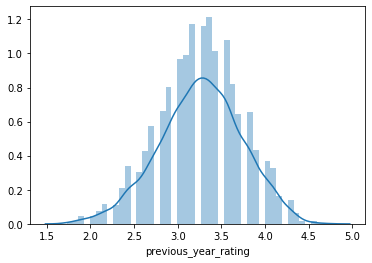

In [92]:
sns.distplot(imputedRatings)

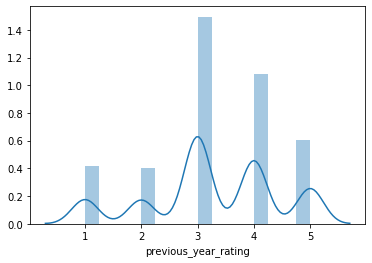

In [95]:
sns.distplot(train['previous_year_rating'][train['length_of_service']==1])

In [83]:
x_train['previous_year_rating'][10]

2.909090909090909

In [48]:
x_train.head(11)

no_of_trainings  age  previous_year_rating  length_of_service  \
0                 1   35                   5.0                  8   
1                 1   30                   5.0                  4   
2                 1   34                   3.0                  7   
3                 2   39                   1.0                 10   
4                 1   45                   3.0                  2   
5                 2   31                   3.0                  7   
6                 1   31                   3.0                  5   
7                 1   33                   3.0                  6   
8                 1   28                   4.0                  5   
9                 1   32                   5.0                  5   
10                1   30                   NaN                  1   

    KPIs_met >80%  awards_won?  avg_training_score  department_Analytics  \
0               1            0                  49                     0   
1               0            0                  60                     0   
2               0            0                  50                     0   
3               0            0                  50                     0   
4               0            0                  73                     0   
5               0            0                  85                     1   
6               0            0                  59                     0   
7               0            0                  63                     0   
8               0            0                  83                     1   
9               1            0                  54                     0   
10              0            0                  77                     0   

    department_Finance  department_HR  ...  region_region_9  \
0                    0              0  ...                0   
1                    0              0  ...                0   
2                    0              0  ...                0   
3                    0              0  ...                0   
4                    0              0  ...                0   
5                    0              0  ...                0   
6                    0              0  ...                0   
7                    0              0  ...                0   
8                    0              0  ...                0   
9                    0              0  ...                0   
10                   0              0  ...                0   

    education_Bachelor's  education_Below Secondary  \
0                      0                          0   
1                      1                          0   
2                      1                          0   
3                      1                          0   
4                      1                          0   
5                      1                          0   
6                      1                          0   
7                      0                          0   
8                      1                          0   
9                      0                          0   
10                     0                          0   

    education_Master's & above  education_unknown  gender_f  gender_m  \
0                            1                  0         1         0   
1                            0                  0         0         1   
2                            0                  0         0         1   
3                            0                  0         0         1   
4                            0                  0         0         1   
5                            0                  0         0         1   
6                            0                  0         1         0   
7                            1                  0         0         1   
8                            0                  0         0         1   
9                            1                  0         0         1   
10                           0           

In [13]:
train['education'].fillna('unknown',inplace=True)

In [10]:
si=SimpleImputer(missing_values=np.nan, strategy='constant',fill_value = 'unknown')
si.fit_transform(train['education'])

ValueError: Expected 2D array, got 1D array instead:
array=["Master's & above" "Bachelor's" "Bachelor's" ... "Bachelor's" nan
 "Bachelor's"].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [175]:
import category_encoders as ce

## Basemodel

In [176]:
from sklearn.linear_model import LogisticRegression
from pandas import get_dummies

model_pipeline=Pipeline(steps=[
    ('preprocess',columnTransform),\
     #('cat', get_dummies() )
    ])

In [177]:
x=model_pipeline.fit_transform(x_train)

ValueError: Input contains NaN

In [161]:
x

array([["Master's & above", 5.0, 1, ..., 1, 0, 49],
       ["Bachelor's", 5.0, 0, ..., 0, 0, 60],
       ["Bachelor's", 3.0, 1, ..., 0, 0, 50],
       ...,
       ["Bachelor's", 5.0, 0, ..., 1, 0, 79],
       ['unknown', 1.0, 1, ..., 0, 0, 45],
       ["Bachelor's", 1.0, 0, ..., 0, 0, 49]], dtype=object)

In [132]:
import scipy.sparse

In [133]:

x=pd.DataFrame.sparse.from_spmatrix(x)

In [134]:
x

0    1    2    3    4    5    6    7    8    9    ...  199  200  201  \
0      0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
1      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
2      1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3      1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4      1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
54803  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
54804  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
54805  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
54806  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
54807  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

       202  203  204  205  206  207  208  
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...    ...  ...  ...  ...  ...  ...  ...  
54803  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
54804  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
54805  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
54806  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
54807  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[54808 rows x 209 columns]

In [31]:
x_train['education'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
54803    False
54804    False
54805    False
54806     True
54807    False
Name: education, Length: 54808, dtype: bool